# **Licenciatura em Ciências da Computação**

### Aprendizagem Computacional 25/26

## Types of Supervised Learning Problems

### 1. Regression
- **Target variable is continuous**
- The model predicts a numeric value
- Examples:
  - House price prediction
  - Temperature forecasting
- Common metrics:
  - Mean Squared Error (MSE)
  - Mean Absolute Error (MAE)
  - R² score

---

### 2. Binary Classification
- **Target variable has two classes**
- The model predicts one of two possible categories
- Examples:
  - Spam vs Not Spam
  - Disease vs No Disease
- Common metrics:
  - Accuracy
  - Precision / Recall
  - F1-score
  - ROC-AUC

---

### 3. Multiclass Classification
- **Target variable has more than two classes**
- The model predicts one class out of multiple categories
- Examples:
  - Handwritten digit recognition (0–9)
  - Species classification (e.g., 3 flower types)
- Common metrics:
  - Accuracy
  - Macro / Weighted Precision, Recall, F1-score

In [33]:
import pandas as pd
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import make_blobs


url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df["ocean_proximity"].unique()

<StringArray>
['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
Length: 5, dtype: str

In [5]:
def drop_na_rows(df: pd.DataFrame) -> pd.DataFrame:
    """Drop rows that contain any NaNs (simple baseline)."""
    return df.dropna(axis=0).reset_index(drop=True)

df_no_na = drop_na_rows(df)
df.shape, df_no_na.shape

((20640, 10), (20433, 10))

In [6]:
# DO NOT USE ON LABEL/y!!
def one_hot_encode_pandas(df: pd.DataFrame, drop_first: bool = False) -> pd.DataFrame:
    cat_cols = df.select_dtypes(include=["object", "category"]).columns
    print('Categorical Columns: ', cat_cols)
    return pd.get_dummies(df, columns=cat_cols, drop_first=drop_first)

df_ohe = one_hot_encode_pandas(df_no_na, drop_first=True)
df_ohe.shape

Categorical Columns:  Index(['ocean_proximity'], dtype='str')


/var/folders/c5/d_4vlyp117175pwl69n8gyvw0000gn/T/ipykernel_88238/337163446.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=["object", "category"]).columns


(20433, 13)

In [7]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

def make_preprocessor(X: pd.DataFrame) -> ColumnTransformer:
    num_cols = X.select_dtypes(include=[np.number]).columns
    cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns

    numeric = SimpleImputer(strategy="median")
    categorical = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore")),
    ])

    return ColumnTransformer(
        transformers=[
            ("num", numeric, num_cols),
            ("cat", categorical, cat_cols),
        ],
        remainder="drop"
    )

In [8]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(y_true, y_pred) -> dict:
    mse = mean_squared_error(y_true, y_pred)
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mse,
        "RMSE": float(np.sqrt(mse)),
        "R2": r2_score(y_true, y_pred),
    }

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Target column in this dataset
TARGET = "median_house_value"

# Basic split
y = df[TARGET]
X = df.drop(columns=[TARGET])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build pipeline
preprocessor = make_preprocessor(X_train)

model = Pipeline([
    ("prep", preprocessor),
    ("reg", Ridge(alpha=1.0)),
])

# Train + predict
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Metrics
regression_metrics(y_test, pred)

/var/folders/c5/d_4vlyp117175pwl69n8gyvw0000gn/T/ipykernel_88238/3866342082.py:8: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns


{'MAE': 50679.19125490692,
 'MSE': 4909646504.544123,
 'RMSE': 70068.8697250364,
 'R2': 0.6253347934829584}

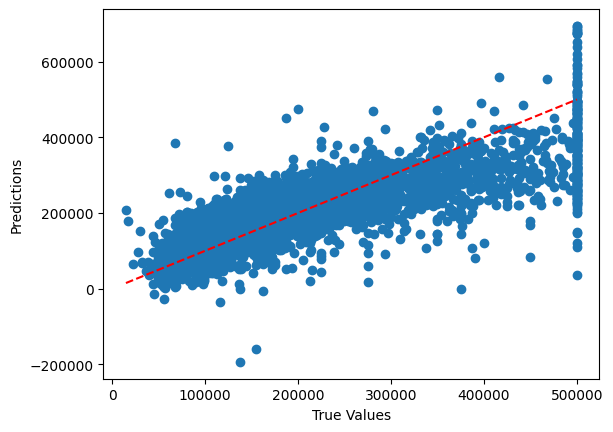

In [10]:
#plot regression true vs predicted with red line
import matplotlib.pyplot as plt
plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [11]:
#agora sou eu
df = pd.read_csv("/Users/josepedro/Desktop/Uni/3ano/2semestre/Aprendizagem Computacional/imdb_top_1000.csv")

df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [28]:
def drop_na_rows(df: pd.DataFrame) -> pd.DataFrame:
    """Drop rows that contain any NaNs (simple baseline)."""
    return df.dropna(axis=0).reset_index(drop=True)

df = drop_na_rows(df)

numerical_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes']


df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Generating pair plot...


<Figure size 1000x800 with 0 Axes>

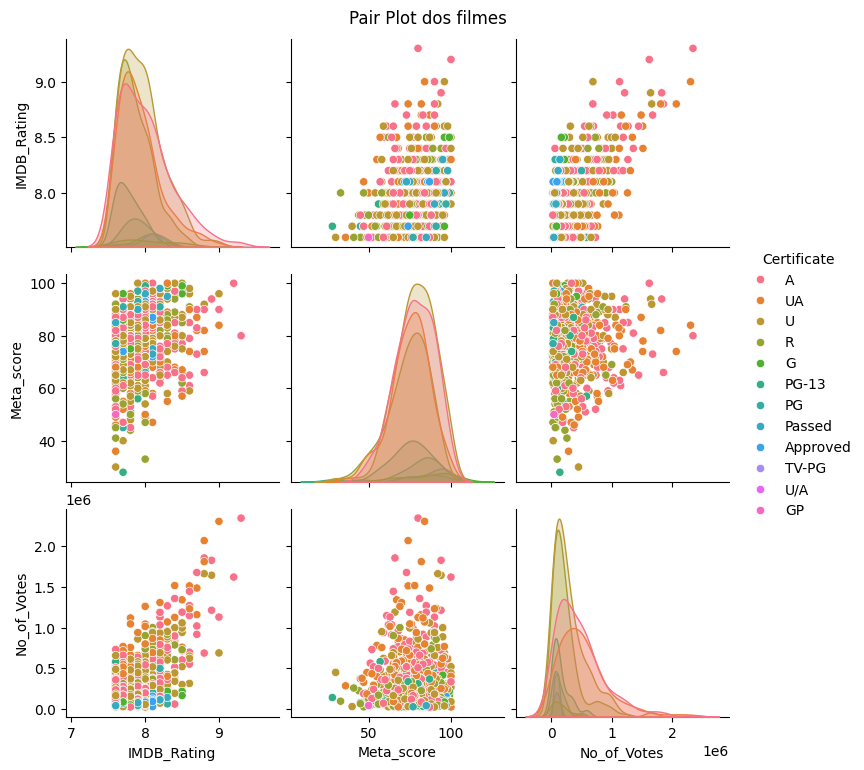

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Generating pair plot...")
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='Certificate', diag_kind='kde')
plt.suptitle('Pair Plot dos filmes', y=1.02)
plt.show()

KeyError: 'IMDB_Rating'

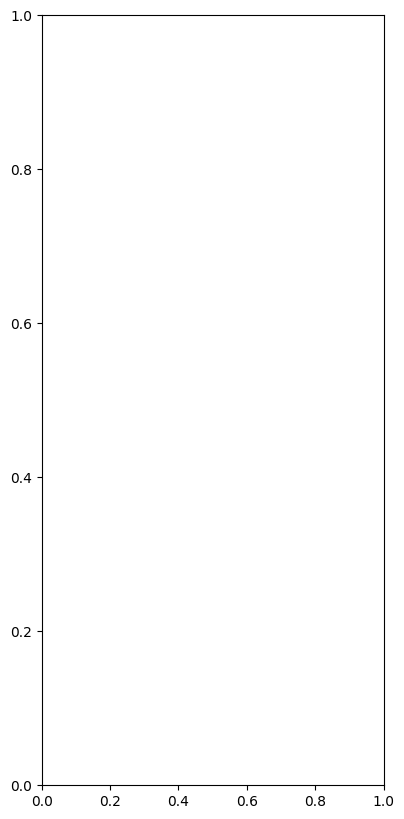

In [35]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(1,3, i +1) # Arrange plots in a 2x2 grid
    sns.histplot(df[col], kde=True) # Use histplot for distribution
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


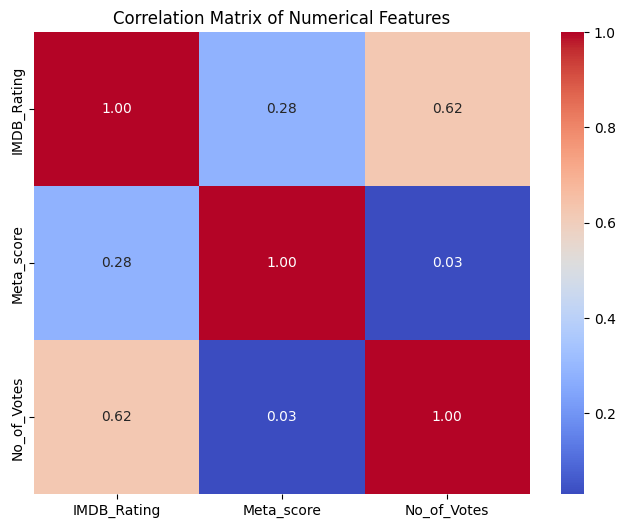

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [32]:

plt.figure(figsize=(5, 5))

# Get unique species and their encoded values to create custom labels
species_map = df[['Certification']].drop_duplicates().set_index('Certification').squeeze().to_dict()
labels = [f"{s} ({species_map[s]})" for s in df['Certification'].unique()]

colors = sns.color_palette('colorblind')

plt.pie(df['Certification'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Certifications')
plt.show()

KeyError: "None of [Index(['Certification'], dtype='str')] are in the [columns]"

<Figure size 500x500 with 0 Axes>